# Introduction

<font size="4">The objective is to predict the operating condition of a waterpoint for each record in the dataset as part of a competition named 'Pump It Up' organized by [DrivenData](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/). Some information about the waterpoints are given. Data comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water. Hence, the dataset is as realistic as it gets, it is most likely that some data preprocessing is required. As quoted by Taarifa, "Taarifa is an open source platform for the crowd sourced reporting and triaging of infrastructure related issues. Think of it as a bug tracker for the real world which helps to engage citizens with their local government. We are currently working on an Innovation Project in Tanzania, with various partners."</font>

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline

import dash 
import dash_html_components as html
import dash_core_components as dcc

import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()

## 2. Preprocess Training and Validation Data

<font size="4">Here we explore the table and see if there are any values that are need to be cleaned and later processed before passing into the model</font>

In [2]:
df_train = pd.read_csv('training_set.csv')

df_train

id  amount_tsh date_recorded                    funder  gps_height  \
0      69572      6000.0    2011-03-14                     Roman        1390   
1       8776         0.0    2013-03-06                   Grumeti        1399   
2      34310        25.0    2013-02-25              Lottery Club         686   
3      67743         0.0    2013-01-28                    Unicef         263   
4      19728         0.0    2011-07-13               Action In A           0   
5       9944        20.0    2011-03-13       Mkinga Distric Coun           0   
6      19816         0.0    2012-10-01                      Dwsp           0   
7      54551         0.0    2012-10-09                     Rwssp           0   
8      53934         0.0    2012-11-03                  Wateraid           0   
9      46144         0.0    2011-08-03               Isingiro Ho           0   
10     49056         0.0    2011-02-20                   Private          62   
11     50409       200.0    2013-02-18                    Danida        1062   
12     36957         0.0    2012-10-14              World Vision           0   
13     50495         0.0    2013-03-15   Lawatefuka Water Supply        1368   
14     53752         0.0    2012-10-20                     Biore           0   
15     61848         0.0    2011-08-04                     Rudep        1645   
16     48451       500.0    2011-07-04                    Unicef        1703   
17     58155         0.0    2011-09-04                    Unicef        1656   
18     34169         0.0    2011-07-22                    Hesawa        1162   
19     18274       500.0    2011-02-22                    Danida        1763   
20     48375       200.0    2011-02-27                       Twe        2216   
21      6091         0.0    2013-02-10                      Dwsp           0   
22     58500         0.0    2011-10-04                    Unicef        1510   
23     37862       500.0    2013-11-03                       Isf         672   
24     51058         0.0    2013-01-21  African Development Bank        1645   
25     22308         0.0    2013-02-25    Government Of Tanzania        1273   
26     55012       500.0    2013-01-16                    Sobodo         200   
27     20145         0.0    2011-07-11                    Hesawa           0   
28     19685         0.0    2013-03-05    Government Of Tanzania        1443   
29     69124         0.0    2013-03-16   Lawatefuka Water Supply        1256   
...      ...         ...           ...                       ...         ...   
59370  14796       200.0    2013-01-29                       NaN        1154   
59371  20387         0.0    2012-10-09               Netherlands           0   
59372  29940         0.0    2012-10-31                       Tlc           0   
59373  15233      5000.0    2013-01-30                     Rudep        1137   
59374  49651         0.0    2012-10-29                     Rwssp           0   
59375  50998     40000.0    2011-08-03    Government Of Tanzania          54   
59376  34716         0.0    2013-02-03                       NaN        1581   
59377  43986         0.0    2012-10-23    Government Of Tanzania           0   
59378  38067       500.0    2011-03-21                        Rc        2101   
59379  58255         0.0    2011-07-13                        Do           0   
59380  30647      6000.0    2011-03-14                     Roman        1439   
59381  67885         0.0    2011-03-16       Mkinga Distric Coun           0   
59382  47002         6.0    2013-08-03                 Ces(gmbh)        1383   
59383  44616         0.0    2013-01-19                World Bank          11   
59384  72148         0.0    2011-07-10                   Concern           0   
59385  34473       500.0    2012-11-03                     Jaica        1327   
59386  34952         0.0    2011-08-22                       Adb        1786   
59387  26640       100.0    2013-03-12                         0          25   
59388  725

<font size="4">Columns that contains almost duplicated information are dropped</font>

In [3]:
cols_to_drop =['funder','date_recorded','installer','wpt_name','extraction_type','extraction_type_group',
               'management','num_private','basin','subvillage','region','lga','ward',
               'permit','public_meeting','recorded_by','scheme_management','scheme_name',
               'payment_type','water_quality','quantity','source','source_type','waterpoint_type']

df_train.drop(cols_to_drop, axis=1, inplace=True)

df_train

id  amount_tsh  gps_height  longitude      latitude  region_code  \
0      69572      6000.0        1390  34.938093 -9.856322e+00           11   
1       8776         0.0        1399  34.698766 -2.147466e+00           20   
2      34310        25.0         686  37.460664 -3.821329e+00           21   
3      67743         0.0         263  38.486161 -1.115530e+01           90   
4      19728         0.0           0  31.130847 -1.825359e+00           18   
5       9944        20.0           0  39.172796 -4.765587e+00            4   
6      19816         0.0           0  33.362410 -3.766365e+00           17   
7      54551         0.0           0  32.620617 -4.226198e+00           17   
8      53934         0.0           0  32.711100 -5.146712e+00           14   
9      46144         0.0           0  30.626991 -1.257051e+00           18   
10     49056         0.0          62  39.209518 -7.034139e+00           60   
11     50409       200.0        1062  35.770258 -1.057417e+01           10   
12     36957         0.0           0  33.798106 -3.290194e+00           17   
13     50495         0.0        1368  37.092574 -3.181783e+00            3   
14     53752         0.0           0  34.364073 -3.629333e+00           17   
15     61848         0.0        1645  31.444121 -8.274962e+00           15   
16     48451       500.0        1703  34.642439 -9.106185e+00           11   
17     58155         0.0        1656  34.569266 -9.085515e+00           11   
18     34169         0.0        1162  32.920154 -1.947868e+00           19   
19     18274       500.0        1763  34.508967 -9.894412e+00           11   
20     48375       200.0        2216  34.473430 -9.594990e+00           11   
21      6091         0.0           0   0.000000 -2.000000e-08           17   
22     58500         0.0        1510  34.586901 -8.980014e+00           11   
23     37862       500.0         672  37.940029 -4.125595e+00            3   
24     51058         0.0        1645  29.747066 -4.495568e+00           16   
25     22308         0.0        1273  37.422751 -3.317536e+00            3   
26     55012       500.0         200  39.370777 -9.942532e+00           80   
27     20145         0.0           0  31.104257 -1.735361e+00           18   
28     19685         0.0        1443  37.611126 -3.263526e+00            3   
29     69124         0.0        1256  37.061688 -3.191989e+00            3   
...      ...         ...         ...        ...           ...          ...   
59370  14796       200.0        1154  30.058731 -4.902633e+00           16   
59371  20387         0.0           0  33.586406 -3.040369e+00           17   
59372  29940         0.0           0  32.058548 -5.052101e+00           14   
59373  15233      5000.0        1137  32.125024 -6.784358e+00           15   
59374  49651         0.0           0   0.000000 -2.000000e-08           17   
59375  50998     40000.0          54  39.046942 -5.061494e+00            4   
59376  34716         0.0        1581  34.821039 -5.076258e+00           13   
59377  43986         0.0           0  33.437012 -4.423594e+00           14   
59378  38067       500.0        2101  34.620387 -9.358405e+00           11   
59379  58255         0.0           0  31.613284 -1.820226e+00           18   
59380  30647      6000.0        1439  34.942101 -9.849198e+00           11   
59381  67885         0.0           0  38.835001 -4.880204e+00            4   
59382  47002         6.0        1383  37.454759 -3.323599e+00            3   
59383  44616         0.0          11  39.626009 -1.005750e+01           80   
59384  72148         0.0           0  30.667805 -2.483710e+00           18   
59385  34473       500.0        1327  33.951681 -2.021854e+00           20   
59386  34952         0.0        1786  31.738789 -8.532013e+00           15   
59387  26640       100.0          25  39.176480 -6.957098e+00            7   
59388  72559         0.0        1414  30.692400 -3.593827e+00           16   
59389  30410         0.0        

In [4]:
df_train.describe(include='all')

id     amount_tsh    gps_height     longitude      latitude  \
count   59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
unique           NaN            NaN           NaN           NaN           NaN   
top              NaN            NaN           NaN           NaN           NaN   
freq             NaN            NaN           NaN           NaN           NaN   
mean    37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std     21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min         0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%     18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%     37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%     55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max     74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

         region_code  district_code    population  construction_year  \
count   59400.000000   59400.000000  59400.000000       59400.000000   
unique           NaN            NaN           NaN                NaN   
top              NaN            NaN           NaN                NaN   
freq             NaN            NaN           NaN                NaN   
mean       15.297003       5.629747    179.909983        1300.652475   
std        17.587406       9.633649    471.482176         951.620547   
min         1.000000       0.000000      0.000000           0.000000   
25%         5.000000       2.000000      0.000000           0.000000   
50%        12.000000       3.000000     25.000000        1986.000000   
75%        17.000000       5.000000    215.000000        2004.000000   
max        99.000000      80.000000  30500.000000        2013.000000   

       extraction_type_class management_group    payment quality_group  \
count                  59400            59400      59400         59400   
unique                     7                5          7             6   
top                  gravity       user-group  never pay          good   
freq                   26780            52490      25348         50818   
mean                     NaN              NaN        NaN           NaN   
std                      NaN              NaN        NaN           NaN   
min                      NaN              NaN        NaN           NaN   
25%                      NaN              NaN        NaN           NaN   
50%                      NaN              NaN        NaN           NaN   
75%                      NaN              NaN        NaN           NaN   
max                      NaN              NaN        NaN           NaN   

       quantity_group source_class waterpoint_type_group  
count           59400        59400                 59400  
unique              5            3                     6  
top            enough  groundwater    communal standpipe  
freq            33186        45794                 34625  
mean              NaN          NaN                   NaN  
std               NaN          NaN                   NaN  
min               NaN          NaN                   NaN  
25%               NaN          NaN                   NaN  
50%               NaN          NaN                   NaN  
75%               NaN          NaN                   NaN  
max               NaN          NaN                   NaN

<font size="4">From description, we see that minimum construction year is 0, hence we impute those with the mean of non-zero year range, and we also noticed that some information in categorical variables are labeled as 'unknown'. We also impute them with the most common label</font>

In [5]:
df_train['construction_year'].replace(0,round(df_train['construction_year'].loc[df_train['construction_year'] != 0].mean(axis=0)),inplace=True)


In [6]:
df_train['construction_year'].describe()

count    59400.000000
mean      1996.879293
std         10.066168
min       1960.000000
25%       1996.000000
50%       1997.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [7]:
for col in df_train.columns:
    df_train[col].replace('unknown', df_train[col].mode()[0], inplace=True)

In [8]:
df_train.iloc[21,3:5]

longitude        0
latitude    -2e-08
Name: 21, dtype: object

In [9]:
#replace the unusual coordinates
df_train['longitude'].replace(df_train['longitude'][21],df_train['longitude'].median(),inplace=True)

df_train['latitude'].replace(df_train['latitude'][21],df_train['latitude'].median(),inplace=True)

In [10]:
df_train = pd.get_dummies(df_train, columns=['extraction_type_class', 'management_group', 'payment', 'quality_group',
       'quantity_group', 'source_class', 'waterpoint_type_group'])

In [ ]:
df_train_label = pd.read_csv('training_label.csv')


In [12]:
df_train_label['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## 3. Define features and labels

<font size="4">Features and labels are defined for the model. Training data is also normalized so that the big variance in some columns does not affect the model's training. A pipepline will also be built to have a sense of how different machine learning models perform.</font>

In [13]:
X = df_train.iloc[:,1:]
y = df_train_label.iloc[:,1]

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [15]:
scaler = StandardScaler()

scaler.fit_transform(X_train)

/Users/tboonhau/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tboonhau/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.10731033, -0.96513846, -0.58561876, ...,  1.55166781,
        -0.11516434, -0.34810602],
       [-0.10731033, -0.79326212,  1.68598705, ...,  1.55166781,
        -0.11516434, -0.34810602],
       [-0.10731033,  1.26780967,  0.16158798, ..., -0.64446784,
        -0.11516434, -0.34810602],
       ...,
       [-0.10731033,  1.12770879, -0.20600223, ..., -0.64446784,
        -0.11516434, -0.34810602],
       [-0.10731033, -0.96513846, -0.92697787, ...,  1.55166781,
        -0.11516434, -0.34810602],
       [-0.09041426, -0.91314226,  1.62922947, ..., -0.64446784,
        -0.11516434, -0.34810602]])

In [16]:
classifiers = [
    KNeighborsClassifier(3),
    #SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_val, y_val))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
model score: 0.700
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
model score: 0.754


/Users/tboonhau/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model score: 0.789
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
model score: 0.717
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='au

## 4. Prepare Model

<font size="4">From pipeline results, it seemed like Random Forest Classifier performed the best under default parameters. Hence, we selected it to be our model.</font>

In [17]:
rand_for = RandomForestClassifier(n_estimators=1000, random_state=42)

rand_for.fit(X_train, y_train)

y_pred = rand_for.predict(X_val)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))

[[5730  186  625]
 [ 459  286  151]
 [ 834   78 3531]]
                         precision    recall  f1-score   support

             functional       0.82      0.88      0.84      6541
functional needs repair       0.52      0.32      0.40       896
         non functional       0.82      0.79      0.81      4443

              micro avg       0.80      0.80      0.80     11880
              macro avg       0.72      0.66      0.68     11880
           weighted avg       0.80      0.80      0.80     11880

0.8036195286195286


## 5.  Fine Tuning Model

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25, 50], 'max_features': [5, 10, 15], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

gs_cv = GridSearchCV(rand_for, param_grid). fit(X_train, y_train)

/Users/tboonhau/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [20]:
gs_cv.best_params_

{'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 50}

## 6. Preprocess Test Data

<font size="4">Test data is also cleaned and preprocessed in a similar manner as training data.</font>

In [21]:
df_test = pd.read_csv('test_set.csv')

df_test

id  amount_tsh date_recorded                          funder  \
0      50785         0.0    2013-02-04                            Dmdd   
1      51630         0.0    2013-02-04          Government Of Tanzania   
2      17168         0.0    2013-02-01                             NaN   
3      45559         0.0    2013-01-22                      Finn Water   
4      49871       500.0    2013-03-27                          Bruder   
5      52449         0.0    2013-03-04          Government Of Tanzania   
6      24806         0.0    2011-03-02          Government Of Tanzania   
7      28965         0.0    2013-01-25                            Finw   
8      36301        30.0    2013-01-23                          Unicef   
9      54122         0.0    2013-03-18         Lawatefuka Water Supply   
10       419         5.0    2013-10-03                 Germany Republi   
11     45750         0.0    2013-02-27                    World Vision   
12       653         0.0    2012-10-11                      World Bank   
13     14017         0.0    2011-07-29               Ministry Of Water   
14     44607      1000.0    2011-03-02                          Danida   
15     40228      1200.0    2013-06-03                          Danida   
16     27714         0.0    2011-02-24                             NaN   
17     28785       200.0    2011-03-11          Government Of Tanzania   
18     28330         0.0    2012-10-06  Rural Water Supply And Sanitat   
19     18532         0.0    2013-02-02                            Finw   
20     69961         0.0    2013-03-12                               0   
21     55083         0.0    2011-03-07                             Dwe   
22      8691         0.0    2013-02-04                           Tasaf   
23     30331         0.0    2013-02-09                             NaN   
24     70970         0.0    2012-10-07                      Mwanashila   
25     61136       200.0    2011-02-23                        Tz Japan   
26     28799         0.0    2013-02-18                         Germany   
27     46825         0.0    2011-04-10                           Water   
28     44718         0.0    2013-02-04                            Dwsp   
29     37350         0.0    2013-02-20                            Bffs   
...      ...         ...           ...                             ...   
14820  52228         0.0    2013-01-27                           Dbfpe   
14821  70038         5.0    2013-03-29                      Ces (gmbh)   
14822  25901        50.0    2013-01-22                             Lga   
14823  21131         0.0    2011-04-03                             NaN   
14824  26580         0.0    2011-04-20                              Po   
14825  66059         0.0    2013-02-02                       Fin Water   
14826  32944         0.0    2012-10-24                    World Vision   
14827  13686         0.0    2011-07-23                          Hesawa   
14828   8471        50.0    2011-02-20                         Private   
14829  19620         0.0    2013-01-03          Government Of Tanzania   
14830  74162         0.0    2013-03-19                            Tcrs   
14831  37994         0.0    2012-10-26                          Hesawa   
14832  71151         0.0    2013-03-25                            Kkkt   
14833  45017      1000.0    2011-03-05                            Kkkt   
14834  12592         0.0    2011-03-27                           Kirde   
14835  58693         0.0    2013-01-25                           Rwssp   
14836  57539         0.0    2011-03-18                           Amref   
14837  71252       500.0    2013-02-10                           Tasaf   
14838   7869      3000.0    2011-03-11                            Kkkt   
14839  57316         0.0    2011-03-11               Devon Aid Korogwe   
14840  59757         0.0    2013-02-24                       Villagers   
14841  64579         0.0    2012-10-26                            Dwsp   
14842  57731  

In [22]:
cols_to_drop =['funder','date_recorded','installer','wpt_name','extraction_type','extraction_type_group',
               'management','num_private','basin','subvillage','region','lga','ward',
               'permit','public_meeting','recorded_by','scheme_management','scheme_name',
               'payment_type','water_quality','quantity','source','source_type','waterpoint_type']

df_test.drop(cols_to_drop, axis=1, inplace=True)

In [23]:
df_test.describe(include='all')

id     amount_tsh    gps_height     longitude      latitude  \
count   14850.000000   14850.000000  14850.000000  14850.000000  1.485000e+04   
unique           NaN            NaN           NaN           NaN           NaN   
top              NaN            NaN           NaN           NaN           NaN   
freq             NaN            NaN           NaN           NaN           NaN   
mean    37161.972929     322.826983    655.147609     34.061605 -5.684724e+00   
std     21359.364833    2510.968644    691.261185      6.593034  2.940803e+00   
min        10.000000       0.000000    -57.000000      0.000000 -1.156459e+01   
25%     18727.000000       0.000000      0.000000     33.069455 -8.443970e+00   
50%     37361.500000       0.000000    344.000000     34.901215 -5.049750e+00   
75%     55799.750000      25.000000   1308.000000     37.196594 -3.320594e+00   
max     74249.000000  200000.000000   2777.000000     40.325016 -2.000000e-08   

         region_code  district_code    population  construction_year  \
count   14850.000000   14850.000000  14850.000000       14850.000000   
unique           NaN            NaN           NaN                NaN   
top              NaN            NaN           NaN                NaN   
freq             NaN            NaN           NaN                NaN   
mean       15.139057       5.626397    184.114209        1289.708350   
std        17.191329       9.673842    469.499332         955.241087   
min         1.000000       0.000000      0.000000           0.000000   
25%         5.000000       2.000000      0.000000           0.000000   
50%        12.000000       3.000000     20.000000        1986.000000   
75%        17.000000       5.000000    220.000000        2004.000000   
max        99.000000      80.000000  11469.000000        2013.000000   

       extraction_type_class management_group    payment quality_group  \
count                  14850            14850      14850         14850   
unique                     7                5          7             6   
top                  gravity       user-group  never pay          good   
freq                    6483            13048       6364         12687   
mean                     NaN              NaN        NaN           NaN   
std                      NaN              NaN        NaN           NaN   
min                      NaN              NaN        NaN           NaN   
25%                      NaN              NaN        NaN           NaN   
50%                      NaN              NaN        NaN           NaN   
75%                      NaN              NaN        NaN           NaN   
max                      NaN              NaN        NaN           NaN   

       quantity_group source_class waterpoint_type_group  
count           14850        14850                 14850  
unique              5            3                     6  
top            enough  groundwater    communal standpipe  
freq             8336        11492                  8614  
mean              NaN          NaN                   NaN  
std               NaN          NaN                   NaN  
min               NaN          NaN                   NaN  
25%               NaN          NaN                   NaN  
50%               NaN          NaN                   NaN  
75%               NaN          NaN                   NaN  
max               NaN          NaN                   NaN

In [24]:
df_test['construction_year'].replace(0,round(df_test['construction_year'].loc[df_test['construction_year'] != 0].mean(axis=0)),inplace=True)

df_test['construction_year'].describe()


count    14850.000000
mean      1997.063232
std          9.892838
min       1960.000000
25%       1996.000000
50%       1997.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [25]:
for col in df_test.columns:
    df_test[col].replace('unknown', df_test[col].mode()[0], inplace=True)

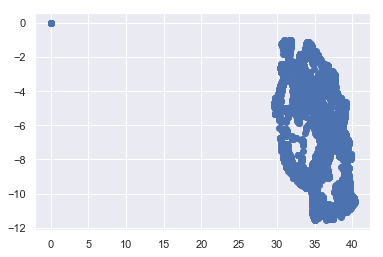

In [26]:
plt.scatter(y=df_test['latitude'],x=df_test['longitude'])

In [27]:
df_test.iloc[28,3:5]

longitude        0
latitude    -2e-08
Name: 28, dtype: object

In [28]:
#replace the unusual coordinates
df_test['longitude'].replace(df_test['longitude'][28],df_test['longitude'].median(),inplace=True)

df_test['latitude'].replace(df_test['latitude'][28],df_test['latitude'].median(),inplace=True)

In [29]:
df_test.iloc[28,3:5]

longitude    34.9012
latitude    -5.04975
Name: 28, dtype: object

In [30]:
df_test = pd.get_dummies(df_test, columns=['extraction_type_class', 'management_group', 'payment', 'quality_group',
       'quantity_group', 'source_class', 'waterpoint_type_group'])

## 7.  Predict Test Data

In [31]:
X_test = df_test.iloc[:,1:]

df_test['predict'] = rand_for.predict(X_test)

In [32]:
df_test['predict'].value_counts()

functional                 8717
non functional             5450
functional needs repair     683
Name: predict, dtype: int64

## 8. Data Visualization

<font size="4">A simple dashboard is constructed consisting of a geomap mapping the location of each waterpoints with their operating status and a bar graph showing the overall status of waterpoints. Similar plots are also created within this notebook.</font>

In [69]:
trace1 = go.Scattergeo(
            lon = df_test['longitude'].loc[df_test['predict'] == 'functional'],
            lat = df_test['latitude'].loc[df_test['predict'] == 'functional'],
            text = df_test['id'].loc[df_test['predict'] == 'functional'],
            name = 'Functional',
            marker=dict(symbol='square',color='blue',opacity = 0.6)
                       )

trace2 = go.Scattergeo(
            lon = df_test['longitude'].loc[df_test['predict'] == 'non functional'],
            lat = df_test['latitude'].loc[df_test['predict'] == 'non functional'],
            text = df_test['id'].loc[df_test['predict'] == 'non functional'],
            name = 'Non-functional',
            marker=dict(symbol='circle',color='red',opacity = 0.6)
                       )

trace3 = go.Scattergeo(
            lon = df_test['longitude'].loc[df_test['predict'] == 'functional needs repair'],
            lat = df_test['latitude'].loc[df_test['predict'] == 'functional needs repair'],
            text = df_test['id'].loc[df_test['predict'] == 'functional needs repair'],
            name = 'Functional Needs Repair',
            marker=dict(symbol='pentagon',color='orange',opacity = 0.6)
                        )

data = [trace1,trace2,trace3]

layout = go.Layout(
    title = 'Mapping of Waterpoints Status', # Graph title
    hovermode ='closest', # handles multiple points landing on the same vertical
    geo_scope = 'africa',
    showlegend=True)



trace4 = go.Bar(
            x = df_test['predict'].unique(),
            y = df_test['predict'].value_counts(),
            marker_color=['blue','red','orange']
            #marker={'color': df_test['predict'].value_counts().values}
                        )

data2 = [trace4]
    
layout2 = go.Layout(
    title='Overall Waterpoints Status'
)


In [ ]:
app = dash.Dash()

app.layout = html.Div([
        html.H1(children='Tanzania Waterpoints Dashboard', style={'textAlign':'center'}),
        html.Div([
           dcc.Graph(id='g1', figure={'data': data, 'layout': layout })
        ], style= {'width': '50%','display': 'inline-block'}),

        html.Div([
            dcc.Graph(id='g2', figure={'data': data2, 'layout': layout2})
        ], style={'width': '50%','display': 'inline-block'})
                  ])



# Add the server clause:
if __name__ == '__main__':
    app.run_server()

In [89]:
fig1 = go.Figure(data= data, layout= layout)
fig1.layout.update(
    autosize=False,
    width=700,
    height=700)

pyo.iplot(fig1, filename = 'mapping')

In [91]:
fig2 = go.Figure(data= data2, layout= layout2)
fig2.layout.update(
    autosize=False,
    width=700,
    height=700)

pyo.iplot(fig2, filename = 'bar')

## 8. Conclusion

<font size="4">It seemed from prediction that there are a lot waterpoints which are non functional but from the mapping, it showed that there are other functional waterpoints within the close proximity. However, the proportion of non functional waterpoints is significant.</font>